### 1. 準備 Set up

In [15]:
# set up
import os
import pandas as pd
import matplotlib.pyplot as plt
import jieba
import jieba.analyse as jiebaa
from wordcloud import WordCloud

# read files
os.chdir('C:\\Coding\\zhnlp\\dpp_tv\\')

with open('data\\tsai.txt','r', encoding='utf8') as infile:
    tsai = infile.read()
    
with open('data\\lai.txt','r', encoding='utf8') as infile:
    lai = infile.read()    

### 2. 關鍵字抽取與解釋 Keyword extraction and Interpretation

In [3]:
## take a look on dictionary: pd.Series(jieba.dt.FREQ)
## correct frequency
jieba.add_word('民進黨',20)
jieba.add_word('前院長',20)

# keyword extraction (by textrank alogirhtm in jieba)
tsai_key = jiebaa.textrank(tsai, 50, withWeight=True, withFlag=True)
tsai_key = [('tsai', idx, item[0].word ,item[1], item[0].flag) for idx, item in enumerate(tsai_key)]
lai_key = jiebaa.textrank(lai, 50, withWeight=True, withFlag=True)    
lai_key = [('lai', idx, item[0].word ,item[1], item[0].flag) for idx, item in enumerate(lai_key)]    

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Wu\AppData\Local\Temp\jieba.cache
Loading model cost 1.050 seconds.
Prefix dict has been built succesfully.


#### 蔡英文演講關鍵字 Top 50 Keywords in Tsai Ing-Wen's Speech

從關鍵字分析，可以看出蔡英文初選講稿的三大主軸：進步價值、堅持改革，以及外交能力。蔡承認，進步價值的社會改革並不容易，但她希望民進黨選民能支持方向正確的改革。同時，她也指出改革已有初步成果，目前需要的只是堅持下去。她強調在目前快速演變的國際情勢下，她是最有能力帶領台灣開創新局的領導者。

In [4]:
tsai_df = pd.DataFrame(tsai_key, columns=['candidate','rank','word','textrank','pos'])
tsai_df

,candidate,rank,word,textrank,pos
0,tsai,0,台灣,1.000000,ns
1,tsai,1,價值,0.305865,n
2,tsai,2,國際,0.283013,n
3,tsai,3,投資,0.274657,vn
4,tsai,4,時候,0.269631,n
5,tsai,5,沒有,0.260701,v
6,tsai,6,國家,0.246356,n
7,tsai,7,產業,0.244182,n
8,tsai,8,開始,0.238961,v
9,tsai,9,改革,0.205911,vn


#### 賴清德演講關鍵字 Top 50 Keywords in Lai Ching-Te's speech

賴清德的初選演說，從關鍵字分析的結果來看，主軸似乎較為分散。主要原因應是在申論部分，賴清德對於各類政策規劃給予大致相等的講稿篇幅。這反而使得沒有一類政策的關鍵字，能比「一般政治溝通」的關鍵字更為突出。更具體的說，在關鍵字清單中，最集中的關鍵字類別應該是「訴求支持、自我推銷」的字詞。像是直接訴求「父老」、「支持」，強調過去「台南市」、「市長」的執政經驗，這種積極的溝通策略符合其挑戰執政者的身分。在政策方面，則在「經濟」、「投資」、「司法」、「教育」、「國際」著墨較多。與蔡英文比較，賴則比較不強調「價值」或「改革」的面向。

In [5]:
lai_df = pd.DataFrame(lai_key, columns=['candidate','rank','word','textrank','pos'])
lai_df

,candidate,rank,word,textrank,pos
0,lai,0,台灣,1.000000,ns
1,lai,1,國家,0.337045,n
2,lai,2,總統,0.307803,n
3,lai,3,民主,0.243501,n
4,lai,4,大家,0.239704,n
5,lai,5,推動,0.238122,v
6,lai,6,經濟,0.234435,n
7,lai,7,人民,0.220749,n
8,lai,8,中國,0.187597,ns
9,lai,9,應該,0.180142,v


 ### 3. 關鍵字文字雲 Text is cheap. Show me the graph (word cloud)

In [54]:
# word cloud generation function 
def get_wordcloud(d, title, **kwargs):
    cloud = WordCloud(**kwargs)
    g = cloud.generate_from_frequencies(d)

    plt.imshow(cloud) 
    plt.title(title, size=18)
    plt.axis("off") 
    plt.tight_layout(pad = 0)  
    plt.show() 

# graph setting 
import matplotlib.font_manager as fm
name = plt.rcParams['font.sans-serif'][0]
fname = [f.fname for f in fm.fontManager.ttflist if f.name==name][0]
wc_param = {'width':800, 'height':600, 'background_color':'white', 'font_path':fname}    
plt.rcParams['figure.figsize']=[8,6]


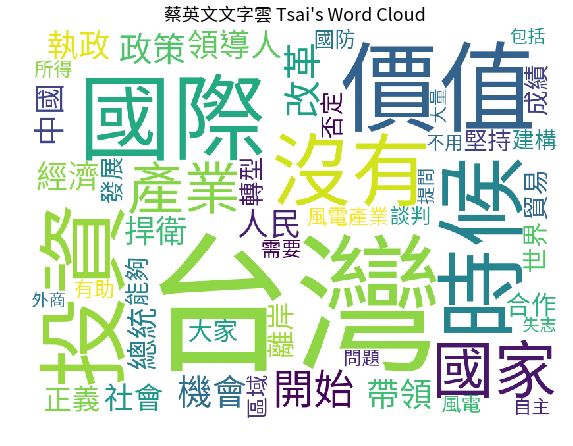

In [55]:
get_wordcloud(dict(zip(tsai_df.word, tsai_df.textrank)), "蔡英文文字雲 Tsai's Word Cloud", **wc_param)

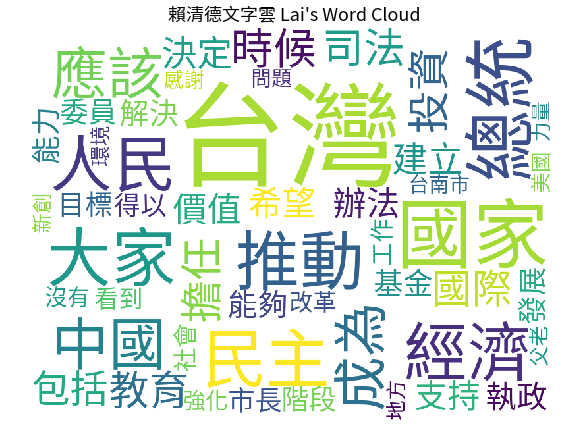

In [57]:
get_wordcloud(dict(zip(lai_df.word, lai_df.textrank)), "賴清德文字雲 Lai's Word Cloud", **wc_param)